## Algoritms #1
## Задачи линейной регрессии

* [Алгоритм линейной регрессии](#regr)
* [Подбор скорости обучения и количества итерации градиентного спуска](#t1)
* [Оптимизация. Избавление от итерации по весам](#t2)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <left>Алгоритм линейной регрессии. Градиентный спуск<a class="anchor" id="regr"></a><left>

In [69]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])

w = np.ones(10)
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = k\cdot x + b$

In [70]:
y_pred1 = 35 * w + X[1]*5.5
y_pred2 = 40 * w + X[1]*7.5

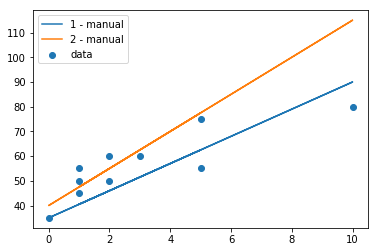

In [73]:
plt.scatter(X[1],y, label='data')
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1],y_pred2, label='2 - manual')
plt.legend()
plt.show()

Вычисление ошибки

In [74]:
simple_err_1 = np.sum(y - y_pred1)
simple_err_2 = np.sum(y - y_pred2)

mae_1 = np.sum(np.abs(y - y_pred1)) / len(y)
mae_2 = np.sum(np.abs(y - y_pred2)) / len(y)

mse_1 = np.sum((y - y_pred1) ** 2) / len(y) 
mse_2 = np.sum((y - y_pred2) ** 2) / len(y)

print(f'Simple Err: {simple_err1, simple_err2}')
print(f'MAE: {mae_1, mae_2}')
print(f'MSE: {mse_1, mse_2}')

Simple Err: (50.0, -60.0)
MAE: (8.5, 9.0)
MSE: (91.75, 188.75)


Метод наименьших квадратов (МНК)

In [75]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [76]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

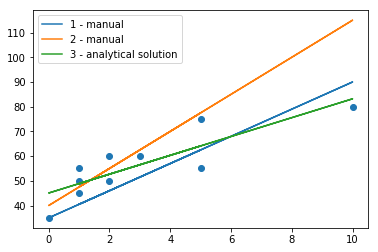

In [77]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [78]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [79]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [80]:
Q

43.96875

## <left>Подбор скорости обучения и количества итераций градиентного спуска<a class="anchor" id="t1"></a><left>

In [184]:
n = X.shape[1]
alpha = 0.055
W = np.array([1, 0.5])
eps = 1e-6
err_delta = 1
err_prev = 0
it = 0

print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

while err_delta > eps:
    it += 1
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    err_delta = np.abs(err - err_prev)
    err_prev = err
    
    
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if it % 10 == 0:
        alpha *= 0.96    
        print(f'Iteration #{it}: W_new = {W}, MSE = {round(err,2)}, alpha = {round(alpha,3)}')
print(f'\ndelta < {eps}. Optimized MSE in {it} iterations')

Number of objects = 10        
Learning rate = 0.055        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [18.95229787  3.08632561], MSE = 960.06, alpha = 0.053
Iteration #20: W_new = [29.51334681  5.52304583], MSE = 195.27, alpha = 0.051
Iteration #30: W_new = [35.48159127  5.45911674], MSE = 91.57, alpha = 0.049
Iteration #40: W_new = [38.98701158  4.91134898], MSE = 63.0, alpha = 0.047
Iteration #50: W_new = [41.13182362  4.52523519], MSE = 51.91, alpha = 0.045
Iteration #60: W_new = [42.47362432  4.28195256], MSE = 47.4, alpha = 0.043
Iteration #70: W_new = [43.32806821  4.12701246], MSE = 45.5, alpha = 0.041
Iteration #80: W_new = [43.88137231  4.0266793 ], MSE = 44.68, alpha = 0.04
Iteration #90: W_new = [44.24547481  3.96065492], MSE = 44.31, alpha = 0.038
Iteration #100: W_new = [44.48879181  3.91653313], MSE = 44.14, alpha = 0.037
Iteration #110: W_new = [44.6538102   3.88660959], MSE = 44.05, alpha = 0.035
Iteration #120: W_new = [44.76732107  3.86602615], MSE = 44.01

## <left>Оптимизация. Избавление от итерации по весам<a class="anchor" id="t2"></a><left>

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [224]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(500): # увеличено кол-во итераций для обнаружения сходимости
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

#     Замещенный цикл итерирования по весам

#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

#   W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))

#   Используем матрично-векторное произведение при корректировке весов
    W -= alpha * (1/n * 2 * X.dot(y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9